# **Import Libraries**

In [136]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# **Load Dataset & Check Info.**

In [137]:
df_dataset = pd.read_csv('./Datasource/Quiz1 Class Train.csv')
df_dataset_original = df_dataset.copy()

df_dataset


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,g,o,u,9.43,25.38,-20.91,-25.84,4.08,B
1,id-002,-2.31,7.36,i,p,y,-3.94,NaN,31.65,12.95,9.82,C
2,id-003,-17.55,-4.09,f,l,v,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,g,p,x,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,i,l,v,2.23,11.76,1.34,4.16,-6.49,B
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,12.54,3.16,h,m,v,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,i,m,u,-10.61,-1.63,-8.81,18.60,10.92,B
487,id-488,13.72,-10.59,i,m,y,-32.73,-3.94,NaN,8.97,-8.30,C
488,id-489,-6.12,-6.37,e,m,u,22.34,-4.66,-10.86,-17.77,-0.21,C


In [138]:
df_dataset.info()
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      480 non-null    object 
 1   x1      480 non-null    float64
 2   x2      480 non-null    float64
 3   x3      480 non-null    object 
 4   x4      480 non-null    object 
 5   x5      480 non-null    object 
 6   x6      480 non-null    float64
 7   x7      480 non-null    float64
 8   x8      480 non-null    float64
 9   x9      480 non-null    float64
 10  x10     480 non-null    float64
 11  y       480 non-null    object 
dtypes: float64(7), object(5)
memory usage: 46.1+ KB


,x1,x2,x6,x7,x8,x9,x10
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,-3.000125,-0.085125,-1.744021,-0.931958,-2.282812,2.502187,-0.143042
std,14.731342,10.011554,20.393239,10.328817,15.360169,15.428457,10.320095
min,-47.000000,-26.900000,-57.220000,-31.150000,-48.590000,-40.500000,-31.950000
25%,-13.700000,-6.972500,-16.577500,-7.187500,-12.592500,-8.522500,-7.407500
50%,-3.665000,0.405000,-2.030000,-0.815000,-4.885000,3.470000,-0.190000
75%,7.437500,6.740000,12.210000,5.345000,7.890000,12.890000,7.550000
max,35.710000,29.050000,71.190000,31.230000,58.320000,52.970000,30.550000


# **Data Cleansing & Re-Check Info.**

In [139]:
df_dataset.drop(['id'], axis=1, inplace=True)
df_dataset.dropna(inplace=True)

df_dataset


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,22.34,0.56,g,o,u,9.43,25.38,-20.91,-25.84,4.08,B
2,-17.55,-4.09,f,l,v,-11.02,-1.77,-17.57,15.98,11.43,D
3,-13.54,-5.42,g,p,x,4.11,2.22,16.72,9.86,16.43,A
4,13.39,-3.20,i,l,v,2.23,11.76,1.34,4.16,-6.49,B
5,0.58,12.09,f,l,x,-13.59,11.67,-12.12,-12.49,-8.07,A
...,...,...,...,...,...,...,...,...,...,...,...
484,-8.77,12.36,g,p,v,1.77,0.16,-1.45,14.18,-2.50,D
485,12.54,3.16,h,m,v,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,8.10,-2.49,i,m,u,-10.61,-1.63,-8.81,18.60,10.92,B
488,-6.12,-6.37,e,m,u,22.34,-4.66,-10.86,-17.77,-0.21,C


In [140]:
le = LabelEncoder()

df_dataset["x3_encoded"] = le.fit_transform(df_dataset["x3"])
df_dataset["x4_encoded"] = le.fit_transform(df_dataset["x4"])
df_dataset["x5_encoded"] = le.fit_transform(df_dataset["x5"])
df_dataset.drop(['x3', 'x4', 'x5'], axis=1, inplace=True)

df_dataset


,x1,x2,x6,x7,x8,x9,x10,y,x3_encoded,x4_encoded,x5_encoded
0,22.34,0.56,9.43,25.38,-20.91,-25.84,4.08,B,2,3,0
2,-17.55,-4.09,-11.02,-1.77,-17.57,15.98,11.43,D,1,0,1
3,-13.54,-5.42,4.11,2.22,16.72,9.86,16.43,A,2,4,3
4,13.39,-3.20,2.23,11.76,1.34,4.16,-6.49,B,4,0,1
5,0.58,12.09,-13.59,11.67,-12.12,-12.49,-8.07,A,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
484,-8.77,12.36,1.77,0.16,-1.45,14.18,-2.50,D,2,4,1
485,12.54,3.16,-3.49,-16.43,-3.70,-4.12,-2.83,D,3,1,1
486,8.10,-2.49,-10.61,-1.63,-8.81,18.60,10.92,B,4,1,0
488,-6.12,-6.37,22.34,-4.66,-10.86,-17.77,-0.21,C,0,1,0


In [141]:
df_dataset.reset_index(inplace=True, drop=True)

df_dataset


,x1,x2,x6,x7,x8,x9,x10,y,x3_encoded,x4_encoded,x5_encoded
0,22.34,0.56,9.43,25.38,-20.91,-25.84,4.08,B,2,3,0
1,-17.55,-4.09,-11.02,-1.77,-17.57,15.98,11.43,D,1,0,1
2,-13.54,-5.42,4.11,2.22,16.72,9.86,16.43,A,2,4,3
3,13.39,-3.20,2.23,11.76,1.34,4.16,-6.49,B,4,0,1
4,0.58,12.09,-13.59,11.67,-12.12,-12.49,-8.07,A,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
387,-8.77,12.36,1.77,0.16,-1.45,14.18,-2.50,D,2,4,1
388,12.54,3.16,-3.49,-16.43,-3.70,-4.12,-2.83,D,3,1,1
389,8.10,-2.49,-10.61,-1.63,-8.81,18.60,10.92,B,4,1,0
390,-6.12,-6.37,22.34,-4.66,-10.86,-17.77,-0.21,C,0,1,0


In [142]:
df_dataset.info()
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          392 non-null    float64
 1   x2          392 non-null    float64
 2   x6          392 non-null    float64
 3   x7          392 non-null    float64
 4   x8          392 non-null    float64
 5   x9          392 non-null    float64
 6   x10         392 non-null    float64
 7   y           392 non-null    object 
 8   x3_encoded  392 non-null    int64  
 9   x4_encoded  392 non-null    int64  
 10  x5_encoded  392 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 33.8+ KB


,x1,x2,x6,x7,x8,x9,x10,x3_encoded,x4_encoded,x5_encoded
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,-3.355714,0.058010,-1.063418,-0.925281,-1.998827,1.996939,-0.293214,2.002551,1.994898,1.984694
std,14.417239,9.931886,20.244656,10.462875,15.371038,15.150783,10.223161,1.396925,1.412395,1.399587
min,-47.000000,-26.900000,-57.220000,-31.150000,-48.550000,-40.500000,-31.950000,0.000000,0.000000,0.000000
25%,-13.602500,-7.000000,-16.017500,-7.045000,-12.592500,-8.887500,-7.662500,1.000000,1.000000,1.000000
50%,-3.845000,0.650000,-1.610000,-0.640000,-4.970000,3.330000,-0.535000,2.000000,2.000000,2.000000
75%,6.607500,6.800000,12.640000,5.372500,8.767500,12.750000,7.287500,3.000000,3.000000,3.000000
max,35.100000,29.050000,56.100000,29.090000,58.320000,52.970000,30.550000,4.000000,4.000000,4.000000


# **Data Exploring**

<AxesSubplot: xlabel='y', ylabel='Count'>

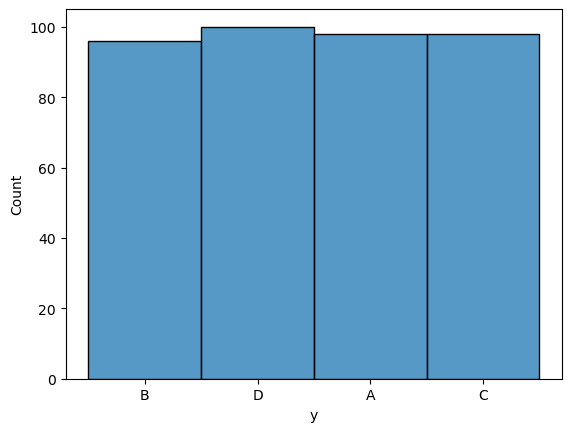

In [143]:
sns.histplot(df_dataset['y'])


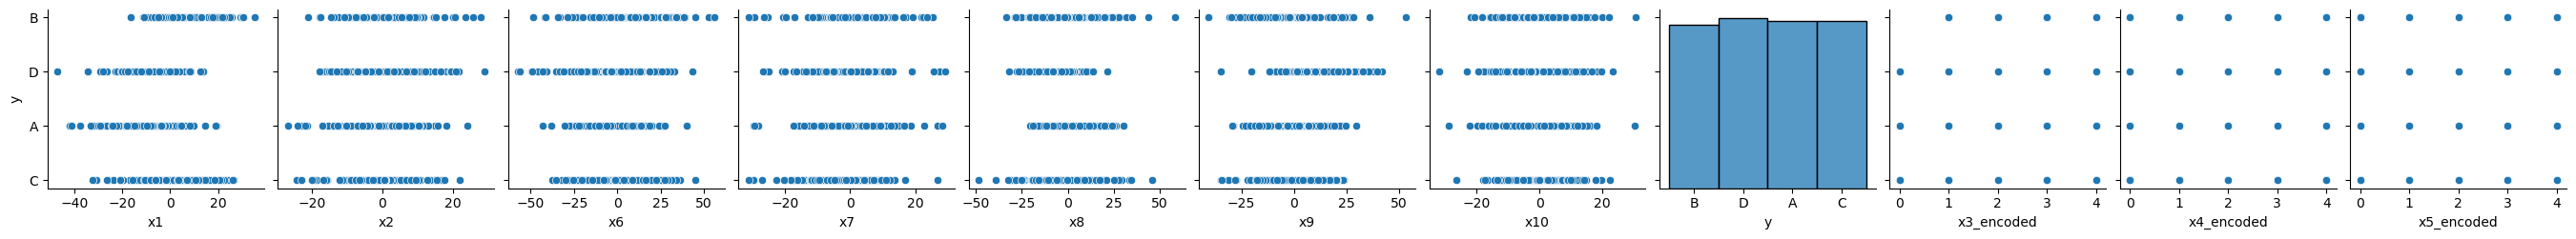

In [144]:
sns.pairplot(df_dataset, x_vars=df_dataset.columns, y_vars=["y"])


# **Create Model**

In [145]:
X = df_dataset[df_dataset.columns].drop('y', axis=1)
y = df_dataset["y"]


### **Create Scaler (for global usage)**

In [146]:
scaler = StandardScaler().fit(X)


### **Scale X**

In [147]:
X = scaler.transform(X)

### **Create necessary variable**

In [148]:
best_model_score = 0
best_model_method = None
best_model_param = None

cv = 4
scoring = "f1_macro"


### **1) Try Neural Network Model**

In [149]:
nn_grid_param = {
    'hidden_layer_sizes': [(200,200,10),(100,50,30)],
    'max_iter': [5000],
    'activation': ['tanh'],
}

grid_search_model = GridSearchCV(
    MLPClassifier(), nn_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

nn_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {nn_score}')

# save best model information #
if nn_score >= best_model_score:
    best_model_score, best_model_method = nn_score, "NN"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.6828579407178947


### **2) Try Logistic Regression Model**

In [150]:
lr_grid_param = {
    'max_iter': [5000],
    'solver': ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

grid_search_model = GridSearchCV(
    LogisticRegression(), lr_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

lr_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {lr_score}')

# save best model information #
if lr_score >= best_model_score:
    best_model_score, best_model_method = lr_score, "LR"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.5410901697347071


### **3) Try Naïve Bayes Model**

In [151]:
lr_grid_param = {
    'var_smoothing': [1e-9],
}

grid_search_model = GridSearchCV(
    GaussianNB(), lr_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

nb_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {nb_score}')

# save best model information #
if nb_score >= best_model_score:
    best_model_score, best_model_method = nb_score, "NB"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.6422806505512373


### **4) Try K-Nearest Neighbors Model**

In [152]:
knn_grid_param = {
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'n_neighbors': [len(y.unique())],
    'weights':["uniform", "distance"]
}

grid_search_model = GridSearchCV(
    KNeighborsClassifier(), knn_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

knn_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {knn_score}')

# save best model information #
if knn_score >= best_model_score:
    best_model_score, best_model_method = knn_score, "KNN"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.6586444204280051


### **Build Model**

In [153]:
print(
    f'choose {best_model_method} model with {scoring} score : {best_model_score}'
)
print(
    f'with best param : {best_model_param}'
)


model = None
if best_model_method == "NN":
    model = MLPClassifier(**best_model_param)
elif best_model_method == "LR":
    model = LogisticRegression(**best_model_param)
elif best_model_method == "NB":
    model = GaussianNB(**best_model_param)
elif best_model_method == "KNN":
    model = KNeighborsClassifier(**best_model_param)

model.fit(X, y)


choose NN model with f1_macro score : 0.6828579407178947
with best param : {'activation': 'tanh', 'hidden_layer_sizes': (200, 200, 10), 'max_iter': 5000}


MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 200, 10),
              max_iter=5000)

# **Predict Unseen Data**

In [154]:
X_unseen = pd.read_csv('./Datasource/Quiz1 Class Unseen.csv')

# unseen data cleansing #
X_unseen.drop(['id'], axis=1, inplace=True)

df_dataset_original_droped_na = df_dataset_original.dropna()

le = LabelEncoder().fit(df_dataset_original_droped_na["x3"])
X_unseen["x3_encoded"] = le.transform(X_unseen['x3'])

le = LabelEncoder().fit(df_dataset_original_droped_na["x4"])
X_unseen["x4_encoded"] = le.transform(X_unseen['x4'])

le = LabelEncoder().fit(df_dataset_original_droped_na["x5"])
X_unseen["x5_encoded"] = le.transform(X_unseen['x5'])

X_unseen.drop(['x3', 'x4', 'x5'], axis=1, inplace=True)

# scale X data #
X_unseen = scaler.transform(X_unseen)

# predict unseen data #
model.predict(X_unseen)


array(['A', 'A', 'A', 'B', 'B', 'D', 'C', 'C', 'D', 'D'], dtype='<U1')